In [1]:
from scipy.special import hyp2f1

hyp2f1()

<ufunc 'hyp2f1'>

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from models.heston import heston_cf
from models.rough_heston import rough_heston_cf_adams

In [4]:
ps = {
    'ALPHA': 0.99,
    'V0': 0.0654,
    'VBAR': 0.0707,
    'LAMBDA': 0.6067,
    'XI': 0.2928,
    'RHO': -0.7571,
    'SPOT': 1,
    'RATE': 0,
}

In [15]:
ttm = 1
ts = np.linspace(0, ttm, 101)
u = 30

In [16]:
ys1 = [heston_cf(u, t, ps) for t in ts]
ys2 = rough_heston_cf_adams(u, ttm, ps, n=100, entire=True).real

/Users/konstantinisstarovoitovs/.pyenv/versions/3.7.1/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/konstantinisstarovoitovs/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


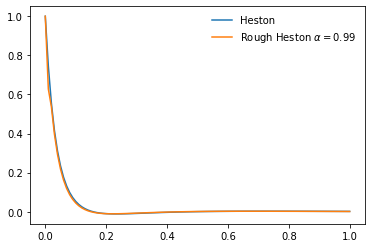

In [33]:
fig, ax = plt.subplots()

ax.plot(ts, ys1, label=r"Heston")
ax.plot(ts, ys2, label=r"Rough Heston $\alpha=0.99$")

ax.legend(frameon=False)

fig.show()
fig.savefig(r"_output/cf.pdf")